# Imports

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset

In [5]:
# data (as pandas dataframes)
file_path = 'adult.csv'
df = pd.read_csv(file_path)
df.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Preprocessing

In [6]:
# Checking for null values
print("Null values before handling:")
print(df.isnull().sum())

# Remove rows with null values
df.dropna(inplace=True)

# Convert income column to binary labels
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Split the data into features and target
X = df.drop(columns=['income'])
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Null values before handling:
Unnamed: 0          0
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


# Using Naive Bayes Classifier to predict whether a person makes over 50K a year or not

In [7]:
# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Confusion matrix

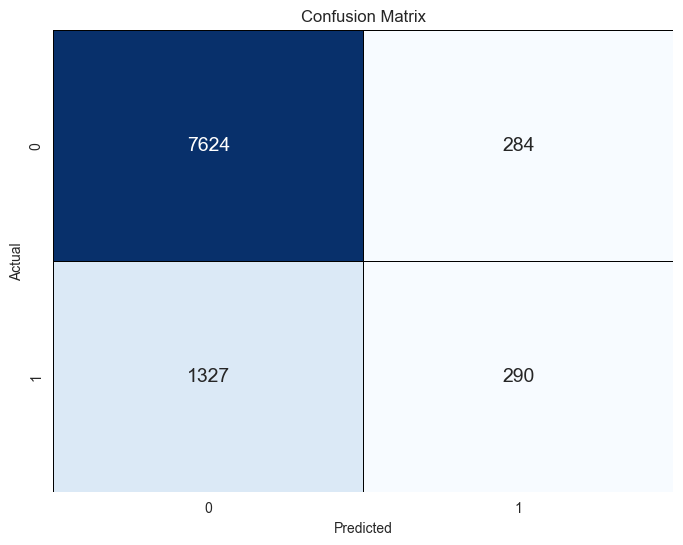

Accuracy: 0.8308661417322835

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      7908
           1       0.51      0.18      0.26      1617

    accuracy                           0.83      9525
   macro avg       0.68      0.57      0.58      9525
weighted avg       0.79      0.83      0.80      9525



In [8]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_positive = conf_matrix[1][1]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Computing Sensitivity and Specificity

In [9]:
# Compute Sensitivity and Specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.17934446505875076
Specificity: 0.9640870005058169


# Computing the posterior probability of making over 50K a year

In [10]:
# Compute posterior probability of making over 50K a year
posterior_prob = nb_classifier.predict_proba(X_test)[:, 1]

print("Posterior Probability of making over 50K a year:", posterior_prob)

Posterior Probability of making over 50K a year: [0.05824489 0.01551052 0.00089664 ... 0.0450935  0.11261027 0.09532542]


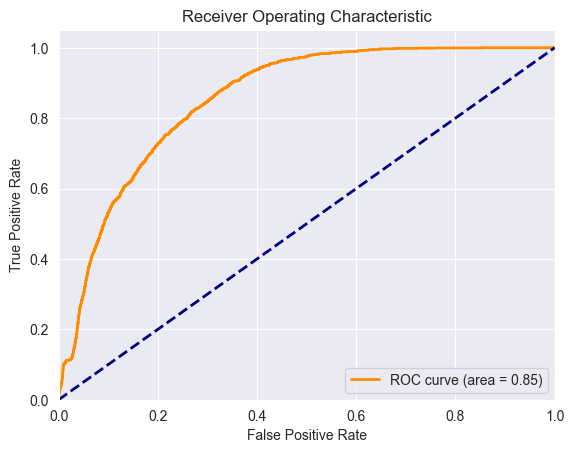

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, posterior_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
